This notebook demonstrates how to use the new `fastKDE.pdf_at_points()` function.

In [1]:
""" Initialize the notebook """
%matplotlib inline
import pylab as PP
import matplotlib as mpl
import os
from fastkde import fastKDE
import numpy as np
import scipy.stats

#Set the default font for plots
font = { 'family' : 'sans-serif', \
         'size' : '15', \
         'weight' : 'bold'}
mpl.rc('font', **font)
mpl.rc('axes', labelweight = 'bold') # needed for bold axis labels in more recent version of matplotlib

import os; print("{}:{}".format('rossby',os.getcwd()))

rossby:/project/fastkde


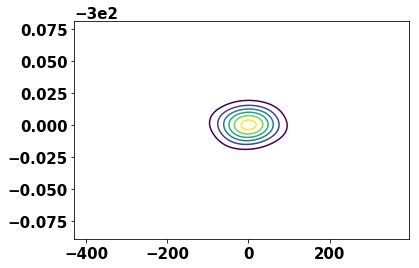

In [2]:
""" Do a traditional fastKDE estimate """
np.random.seed(0)
#Generate two random variables dataset (representing 100000 pairs of datapoints)
N = int(2e4)
pdf1 = scipy.stats.norm(loc=0.1,scale=50) #50*np.random.normal(size=N) + 0.1
pdf2 = scipy.stats.norm(loc=-300,scale=0.01) #0.01*np.random.normal(size=N) - 300

var1 = pdf1.rvs(N)
var2 = pdf2.rvs(N)

#Do the self-consistent density estimate
myPDF,axes = fastKDE.pdf(var1,var2)

#Extract the axes from the axis list
v1,v2 = axes

#Plot contours of the PDF should be a set of concentric ellipsoids centered on
#(0.1, -300) Comparitively, the y axis range should be tiny and the x axis range
#should be large
PP.contour(v1,v2,myPDF)
PP.show()


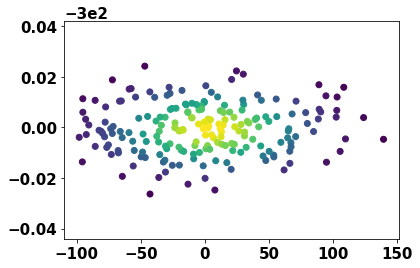

In [3]:
""" Do a point-based estimate. """

# get a subset of the input data points
s = slice(None,None,100)
p1,p2 = var1[s], var2[s]

# calculate the PDF at a subset of the input points
myPDF = fastKDE.pdf_at_points(var1,var2,list_of_points = np.array(list(zip(p1,p2))))

# Plot the point-based estimate
PP.scatter(p1,p2,c=myPDF)
PP.show()

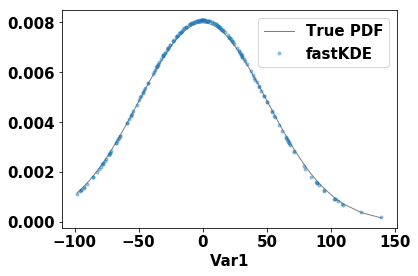

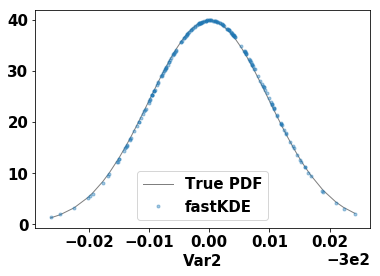

In [4]:
""" Plot the marginals using the point-based estimate"""
# calculate the PDF at a subset of input data points
myPDF1 = fastKDE.pdf_at_points(var1,list_of_points = p1)

# plot the fastKDE PDF and the true PDF
PP.plot(sorted(p1),pdf1.pdf(sorted(p1)),'k-',alpha=0.5,linewidth=1,label='True PDF')
PP.plot(p1,myPDF1,'.',alpha=0.4,label='fastKDE')
PP.xlabel('Var1')
PP.legend(loc='best')
PP.show()

# calculate the PDF at a subset of input data points
myPDF2 = fastKDE.pdf_at_points(var2,list_of_points = p2)

# plot the fastKDE PDF and the true PDF
PP.plot(sorted(p2),pdf2.pdf(sorted(p2)),'k-',alpha=0.5,linewidth=1,label='True PDF')
PP.plot(p2,myPDF2,'.',alpha=0.4,label='fastKDE')
PP.xlabel('Var2')
PP.legend(loc='best')
PP.show()